# Kaptagat Sales Insights 

## Objective is to expore the sales dataset and determing the top selling products and our top customers

In [1]:
# Load in some packages
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# load dataset
kaptagat_df =pd.read_csv(r"C:\Users\john\Documents\Kaptagat Springs Sales Insights.csv")  
kaptagat_df.head(6)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,ORDERDATE.1,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME
0,10100,30,30,3,90,1/6/2003 0:00,1/6/2013 0:00,Shipped,1,1,2013,500 ml,170,S18_1749,Sirikwa Hotel
1,10100,50,30,2,60,1/6/2003 0:00,1/6/2013 0:00,Shipped,1,1,2013,500 ml,60,S18_2248,Sirikwa Hotel
2,10100,22,30,4,120,1/6/2003 0:00,1/6/2013 0:00,Shipped,1,1,2013,500 ml,92,S18_4409,Sirikwa Hotel
3,10100,49,30,1,30,1/6/2003 0:00,1/6/2013 0:00,Shipped,1,1,2013,500 ml,41,S24_3969,Sirikwa Hotel
4,10101,25,30,4,120,1/9/2003 0:00,1/9/2013 0:00,Shipped,1,1,2013,500 ml,127,S18_2325,Sirikwa Hotel
5,10101,26,30,1,30,1/9/2003 0:00,1/9/2013 0:00,Shipped,1,1,2013,500 ml,168,S18_2795,Sirikwa Hotel


After getting a sense of the data's structure, it is a good idea to look at a statistical summary of the variables with kaptagat_df.describe()

In [2]:
kaptagat_df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,308.345731,6.466171,2.717676,7.092455,2013.81509,100.715551
std,92.085478,9.741443,417.564793,4.225841,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,25.000000,1.000000,1.000000,1.000000,2013.00000,33.000000
25%,10180.000000,27.000000,30.000000,3.000000,2.000000,4.000000,2013.00000,68.000000
50%,10262.000000,35.000000,250.000000,6.000000,3.000000,8.000000,2014.00000,99.000000
75%,10333.500000,43.000000,250.000000,9.000000,4.000000,11.000000,2014.00000,124.000000
max,10425.000000,97.000000,1400.000000,18.000000,4.000000,12.000000,2015.00000,214.000000


In [3]:
# lets  check for missing values
missing_values  = kaptagat_df.isna().sum()
print(missing_values)

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
ORDERDATE.1        0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CUSTOMERNAME       0
dtype: int64


In [4]:
# lets check the data types
kaptagat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ORDERNUMBER      2823 non-null   int64 
 1   QUANTITYORDERED  2823 non-null   int64 
 2   PRICEEACH        2823 non-null   int64 
 3   ORDERLINENUMBER  2823 non-null   int64 
 4   SALES            2823 non-null   object
 5   ORDERDATE        2823 non-null   object
 6   ORDERDATE.1      2823 non-null   object
 7   STATUS           2823 non-null   object
 8   QTR_ID           2823 non-null   int64 
 9   MONTH_ID         2823 non-null   int64 
 10  YEAR_ID          2823 non-null   int64 
 11  PRODUCTLINE      2823 non-null   object
 12  MSRP             2823 non-null   int64 
 13  PRODUCTCODE      2823 non-null   object
 14  CUSTOMERNAME     2823 non-null   object
dtypes: int64(8), object(7)
memory usage: 330.9+ KB


In [5]:
kaptagat_df['ORDERDATE.1'] = pd.to_datetime(kaptagat_df['ORDERDATE.1'])

In [6]:
# lets check the data types
kaptagat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   int64         
 3   ORDERLINENUMBER  2823 non-null   int64         
 4   SALES            2823 non-null   object        
 5   ORDERDATE        2823 non-null   object        
 6   ORDERDATE.1      2823 non-null   datetime64[ns]
 7   STATUS           2823 non-null   object        
 8   QTR_ID           2823 non-null   int64         
 9   MONTH_ID         2823 non-null   int64         
 10  YEAR_ID          2823 non-null   int64         
 11  PRODUCTLINE      2823 non-null   object        
 12  MSRP             2823 non-null   int64         
 13  PRODUCTCODE      2823 non-null   object        
 14  CUSTOMERNAME     2823 non-null   object 

In [7]:
# Let's create a new variable, Month, from 'Order Date':

kaptagat_df['Month'] = kaptagat_df['ORDERDATE.1'].dt.month
kaptagat_df['Month'].describe()

count    2823.000000
mean        7.092455
std         3.656633
min         1.000000
25%         4.000000
50%         8.000000
75%        11.000000
max        12.000000
Name: Month, dtype: float64

In [8]:
# Remove commas and convert to float
kaptagat_df['SALES'] = kaptagat_df['SALES'].str.replace(',', '').astype(float)

# Convert to int
kaptagat_df['SALES'] = kaptagat_df['SALES'].astype(int)



In [9]:
# lets check the data types
kaptagat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITYORDERED  2823 non-null   int64         
 2   PRICEEACH        2823 non-null   int64         
 3   ORDERLINENUMBER  2823 non-null   int64         
 4   SALES            2823 non-null   int32         
 5   ORDERDATE        2823 non-null   object        
 6   ORDERDATE.1      2823 non-null   datetime64[ns]
 7   STATUS           2823 non-null   object        
 8   QTR_ID           2823 non-null   int64         
 9   MONTH_ID         2823 non-null   int64         
 10  YEAR_ID          2823 non-null   int64         
 11  PRODUCTLINE      2823 non-null   object        
 12  MSRP             2823 non-null   int64         
 13  PRODUCTCODE      2823 non-null   object        
 14  CUSTOMERNAME     2823 non-null   object 

In [10]:
kaptagat_df.head(4)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,ORDERDATE.1,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,Month
0,10100,30,30,3,90,1/6/2003 0:00,2013-01-06,Shipped,1,1,2013,500 ml,170,S18_1749,Sirikwa Hotel,1
1,10100,50,30,2,60,1/6/2003 0:00,2013-01-06,Shipped,1,1,2013,500 ml,60,S18_2248,Sirikwa Hotel,1
2,10100,22,30,4,120,1/6/2003 0:00,2013-01-06,Shipped,1,1,2013,500 ml,92,S18_4409,Sirikwa Hotel,1
3,10100,49,30,1,30,1/6/2003 0:00,2013-01-06,Shipped,1,1,2013,500 ml,41,S24_3969,Sirikwa Hotel,1


# 1. What was the best month for sales? How much was earned that month?

The best month for sales was Nov with earnings of $1,160,710.00


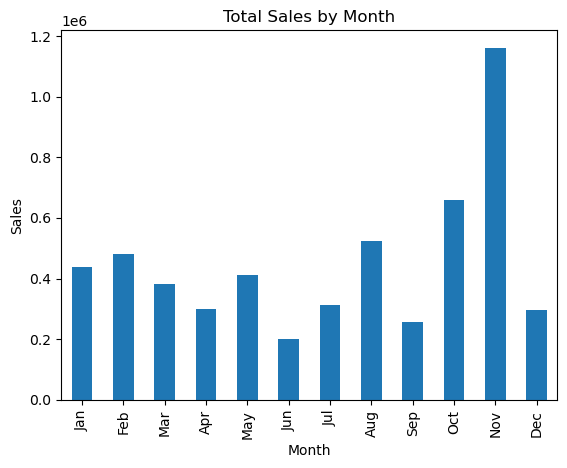

In [11]:
import calendar
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

warnings.filterwarnings("ignore")

# Assuming kaptagat_df['Month'] already contains integer values from 1 to 12
kaptagat_df['Month'] = kaptagat_df['Month'].fillna(0).astype(int)

# Remove any rows where Month is 0 or invalid
kaptagat_df = kaptagat_df[kaptagat_df['Month'].between(1, 12)]

# Convert month numbers to abbreviated month names
kaptagat_df['Month Name'] = kaptagat_df['Month'].apply(lambda x: calendar.month_abbr[x])

# Group by month and calculate total sales for each month
sales_by_month = kaptagat_df.groupby('Month Name')['SALES'].sum()

# Ensure the months are in the correct order
sales_by_month = sales_by_month.reindex(list(calendar.month_abbr)[1:])

# Find the best month for sales and the corresponding earnings
best_month = sales_by_month.idxmax()
earnings_for_best_month = sales_by_month.max()

print(f"The best month for sales was {best_month} with earnings of ${earnings_for_best_month:,.2f}")

# Optionally, you can plot the sales by month
sales_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total Sales by Month')
plt.show()


# 2. What Top 5 Products had the Highest number of Sales?

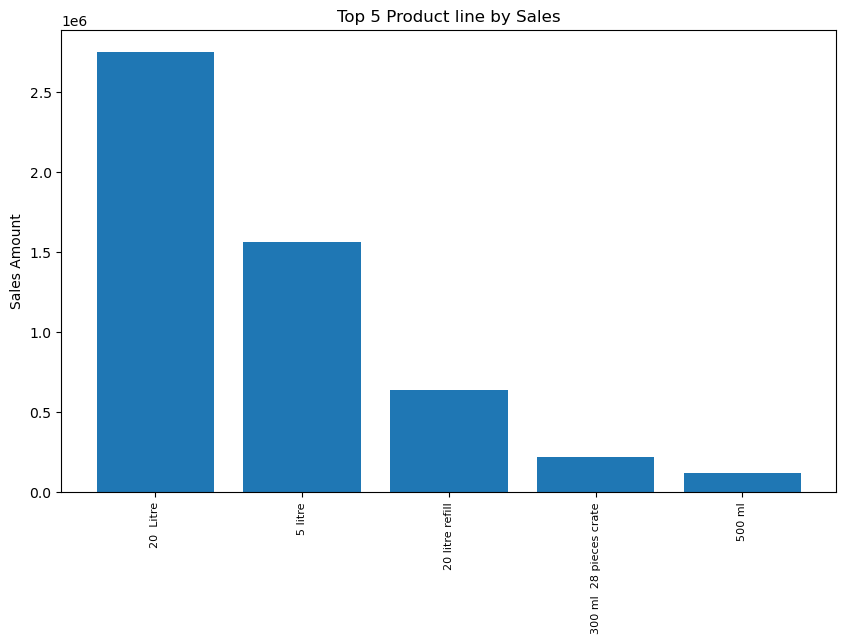

PRODUCTLINE
20  Litre                  2748200
5 litre                    1558250
20 litre refill             636400
300 ml  28 pieces crate     220000
500 ml                      115020
Name: SALES, dtype: int32


In [12]:
# Group by Product Line and calculate total sales for each Product Line
Sales_by_productline = kaptagat_df.groupby('PRODUCTLINE')['SALES'].sum()

# Sort the Product Line   by total sales in descending order and select the top 5
top5_products = Sales_by_productline.sort_values(ascending=False).head(5)

# Plot the top 5 Product Line
plt.figure(figsize=(10, 6))
plt.bar(top5_products.index, top5_products.values)
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Sales Amount')
plt.xlabel('')
plt.title('Top 5 Product line by Sales')
plt.show()

# Display the top 5 product lines and their sales amounts
print(top5_products)


# 3. Top 5 Customers

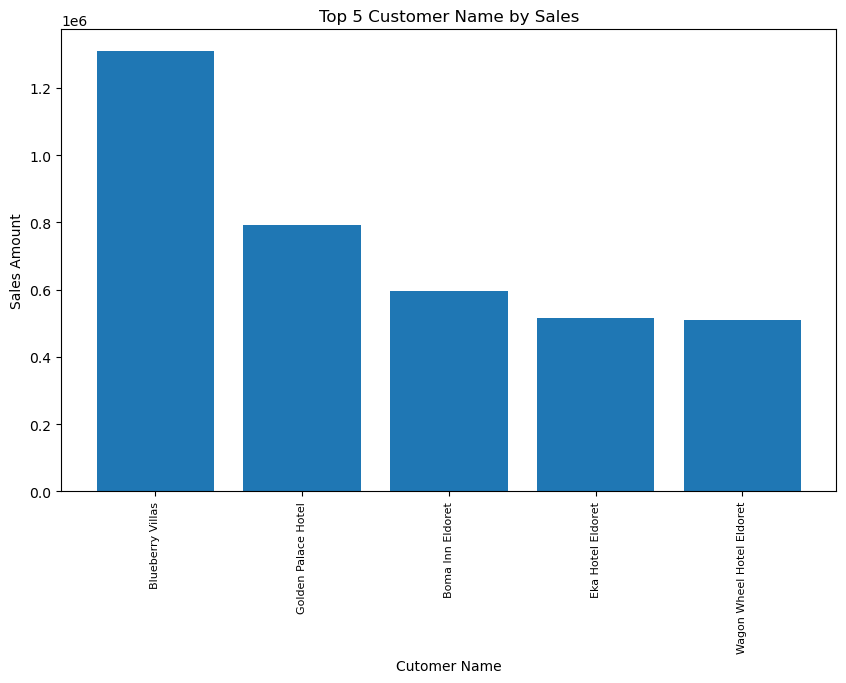

CUSTOMERNAME
Blueberry Villas             1308690
Golden Palace Hotel           791395
Boma Inn Eldoret              594480
Eka Hotel Eldoret             514255
Wagon Wheel Hotel Eldoret     509690
Name: SALES, dtype: int32


In [13]:
# Group by customer name and calculate total sales for each customer name
Sales_by_customers = kaptagat_df.groupby('CUSTOMERNAME')['SALES'].sum()

# Sort the customer name  by total sales in descending order and select the top 5
top5_customers = Sales_by_customers.sort_values(ascending=False).head(5)

# Plot the top 5 customer names
plt.figure(figsize=(10, 6))
plt.bar(top5_customers.index, top5_customers.values)
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Sales Amount')
plt.xlabel('Cutomer Name')
plt.title('Top 5 Customer Name by Sales')
plt.show()

# Display the top 5 Customer and their sales amounts
print(top5_customers)


# 4. What Bottom  5 Products had the Lowest number of Sales?

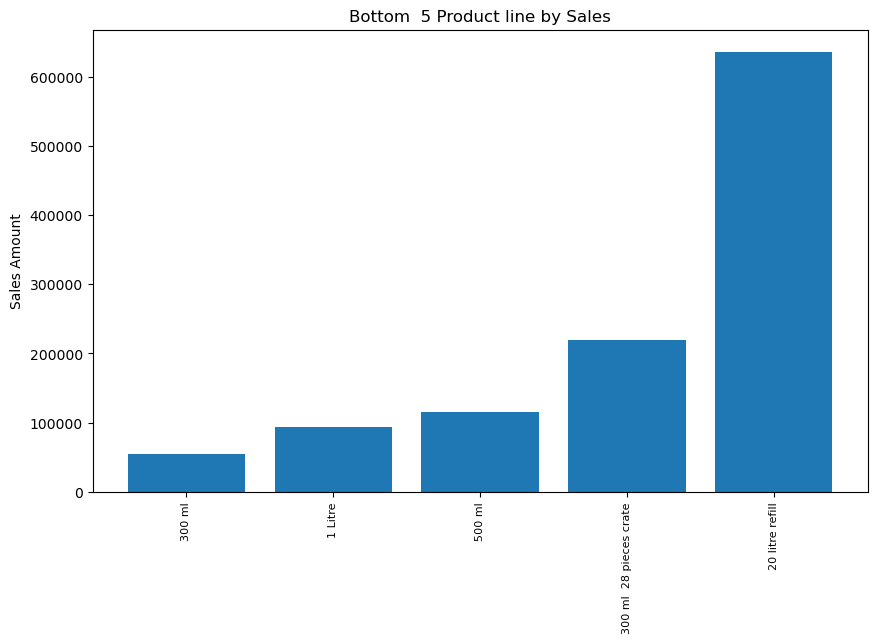

PRODUCTLINE
300 ml                      55250
1 Litre                     93650
500 ml                     115020
300 ml  28 pieces crate    220000
20 litre refill            636400
Name: SALES, dtype: int32


In [14]:
# Group by Product Line and calculate total sales for each Product Name
Sales_by_productline = kaptagat_df.groupby('PRODUCTLINE')['SALES'].sum()

# Sort the Product Line  by total sales in Ascending  order and select the top 5
bottom_5_products = Sales_by_productline.sort_values(ascending=True).head(5)

# Plot the bottom  5 Product Line 
plt.figure(figsize=(10, 6))
plt.bar(bottom_5_products.index, bottom_5_products.values)
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Sales Amount')
plt.xlabel('')
plt.title('Bottom  5 Product line by Sales')
plt.show()

# Display the top 5 product lines and their sales amounts
print(bottom_5_products)

# 5 . Bottom  5 Customers 

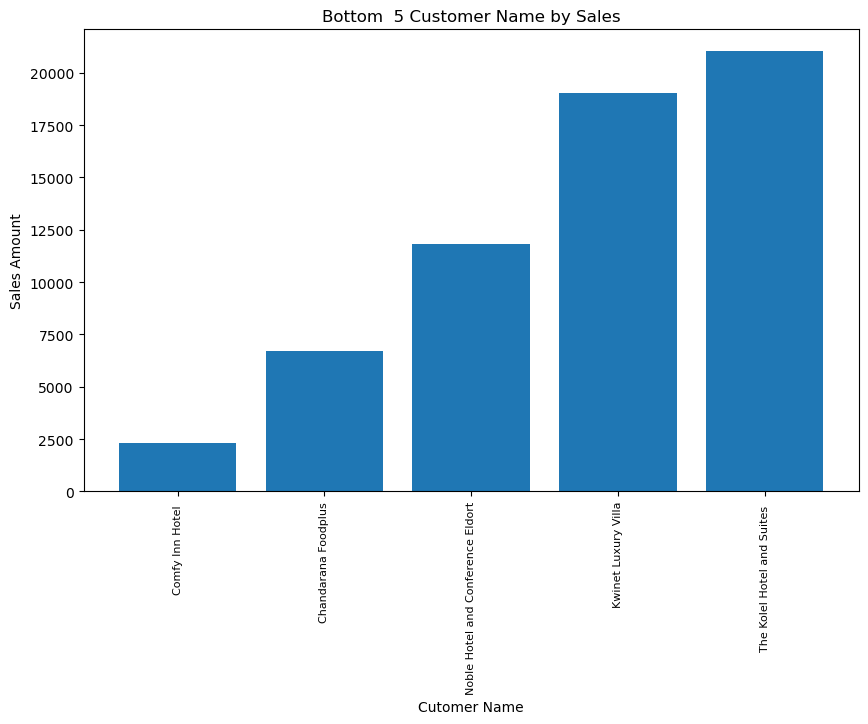

CUSTOMERNAME
Comfy Inn Hotel                       2295
Chandarana Foodplus                   6730
Noble Hotel and Conference Eldort    11805
Kwinet Luxury Villa                  19030
The Kolel Hotel and Suites           21020
Name: SALES, dtype: int32


In [15]:
# Group by customer name and calculate total sales for each customer name
Sales_by_customers = kaptagat_df.groupby('CUSTOMERNAME')['SALES'].sum()

# Sort the customer name  by total sales in descending order and select the bottom  5
bottom_5_customers = Sales_by_customers.sort_values(ascending=True).head(5)

# Plot the bottom  5 customer 
plt.figure(figsize=(10, 6))
plt.bar(bottom_5_customers.index, bottom_5_customers.values)
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Sales Amount')
plt.xlabel('Cutomer Name')
plt.title('Bottom  5 Customer Name by Sales')
plt.show()

# Display the top 5 Customer and their sales amounts
print(bottom_5_customers)


# 6 Conclusions


## 1 Which month has the highest sales
The best month for sales was Nov with earnings of $1,160,710.00

## 2.What are tte Top 5 Products Line
20  Litre                  
5 Litre                   
20 Litre refill          
300 ml  28 pieces crate  
500 ml                  

## 3.What are the top 5 Customers
Blueberry Villas             
Golden Palace Hotel          
Eka Hotel Eldoret          
Wagon Wheel Hotel Eldoret 

## 4.What are Bottom 5 Customers
Comfy Inn Hotel                       
Chandarana Foodplus                  
Noble Hotel and Conference Eldoret
Kwinet Luxury Villa               
The Kolel Hotel and Suites       

## 5.What are out bottom 5 products
300 ml                      
1 Litre                   
500 ml                   
300 ml  28 pieces crate 
20 Litre refill        

We should increase the production of the 20 Litre bottle
We should expand line of credit for our top customer Blueberry Villas 
00
m 5 Products